 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [236]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [227]:
# Reading whale returns
whale_path = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns= whale_returns.sort_index(ascending=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [239]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [240]:
# Drop nulls
whale_returns=whale_returns.dropna()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [241]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending=True)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [242]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [243]:
# Drop nulls
algo_returns=algo_returns.dropna()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [244]:
# Reading S&P 500 Closing Prices
sp500_path = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df= sp500_df.sort_index(ascending=True)
sp500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [245]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [246]:
# Fix Data Types
for column in sp500_df.columns:
    sp500_df[column] = sp500_df[column].str.replace('$', "", regex=True)
print(sp500_df)

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]


In [247]:
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df.dtypes



Close    float64
dtype: object

In [248]:
#calculate daily returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()
# Drop nulls
sp500_returns= sp500_returns.dropna()
sp500_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [249]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns
sp500_returns = sp500_returns.rename(columns= {"Close": "SP500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [250]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

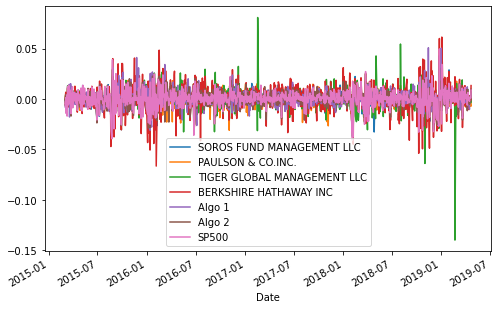

In [199]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(8, 5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Whale, Algorithmic, and SP500'}, xlabel='Date'>

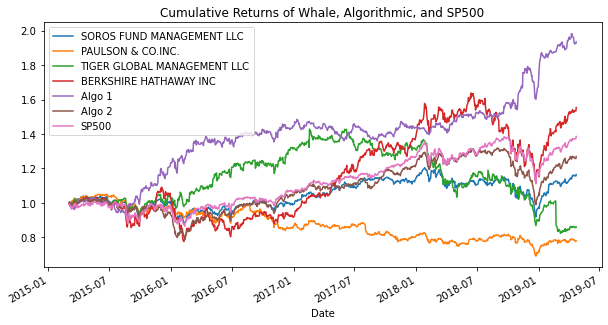

In [251]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() 
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 5), title="Cumulative Returns of Whale, Algorithmic, and SP500")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Whale Returns'}>

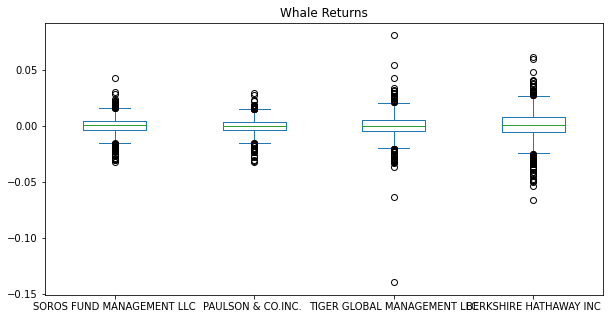

In [108]:
# Box plot to visually show risk
whale_returns.plot(kind='box', title='Whale Returns', figsize=(10, 5))

<AxesSubplot:title={'center':'Algorithmic Returns'}>

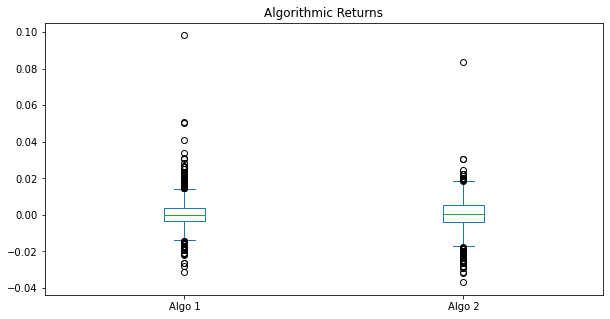

In [109]:
algo_returns.plot(kind='box', title='Algorithmic Returns', figsize=(10,5))

<AxesSubplot:title={'center':'SP500 Returns'}>

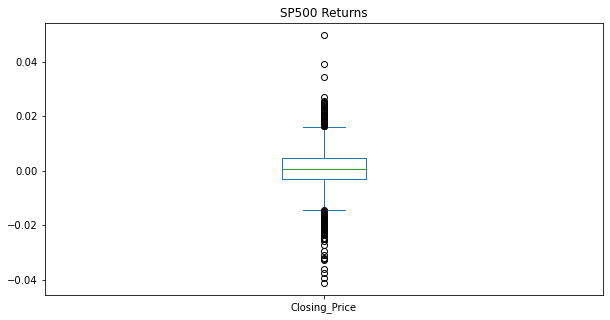

In [58]:
sp500_returns.plot(kind='box', title='SP500 Returns', figsize=(10,5))

### Calculate Standard Deviations

In [252]:
# Calculate the daily standard deviations of all portfolios
combined_df_std= combined_df.std()
combined_df_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [257]:
# Calculate  the daily standard deviation of S&P 500
#sp500returns_std= sp500_returns.std()
sp500returns_std = combined_df["SP500"].std()


In [258]:
# Determine which portfolios are riskier than the S&P 500
combined_df_std > sp500returns_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

Tiger global management and Berkshire Hathaway are riskier than the S&P500.

### Calculate the Annualized Standard Deviation

In [254]:
# Calculate the annualized standard deviation (252 trading days)
combined_df_anstd= combined_df_std * np.sqrt(252)
combined_df_anstd.head(10)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

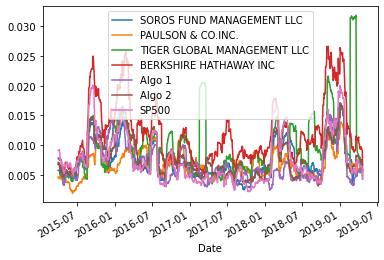

In [205]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

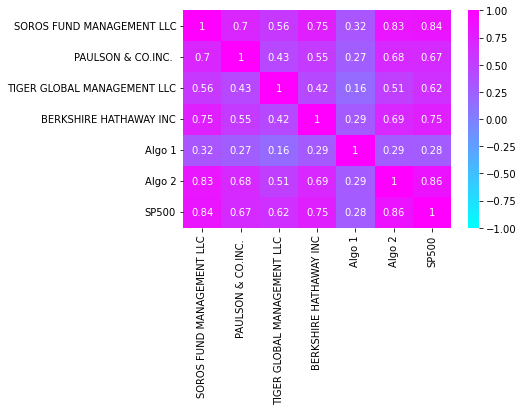

In [206]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap= "cool")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Berkshire Hathaway Beta'}, xlabel='Date'>

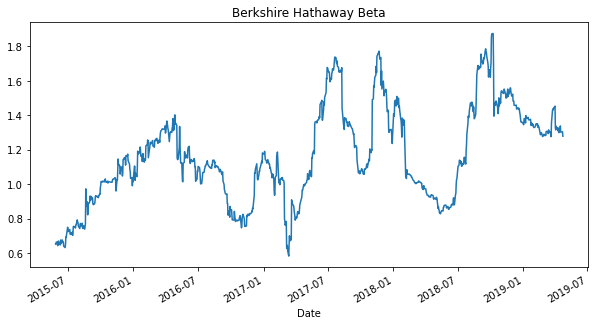

In [256]:
# Calculate covariance of a single portfolio
covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP500'])


# Calculate variance of S&P 500
variance = combined_df['SP500'].rolling(window=60).var()
#variance


# Computing beta
# beta = covar / var
beta = covariance / variance


# Plot beta trend
beta.plot(figsize=(10,5), title="Berkshire Hathaway Beta")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'EWM Chart'}, xlabel='Date'>

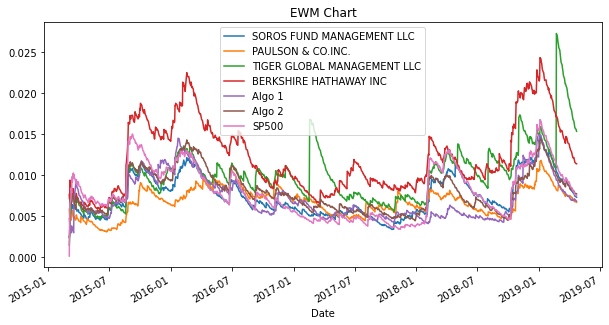

In [208]:
# Use `ewm` to calculate the rolling window
#times=
combined_df.ewm(halflife=21).std().plot(figsize=(10,5), title = "EWM Chart")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() *252)/(combined_df.std() * np.sqrt(252))
sharpe_ratios.head(8)

<AxesSubplot:title={'center':'Combined Portfolio Sharpe Ratios'}>

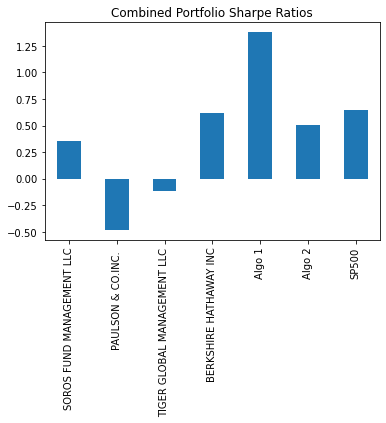

In [234]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Combined Portfolio Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The Algorithmic strategies outperfoms the SP500 and the whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [147]:
# Reading data from 1st stock
csvpath = Path("./Resources/AAPL_2019.csv")
aapl_df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
aapl_df

,Close
Date,
2019-01-02 16:00:00,39.48
2019-01-03 16:00:00,35.55
2019-01-04 16:00:00,37.07
2019-01-07 16:00:00,36.98
2019-01-08 16:00:00,37.69
...,...
2019-12-23 16:00:00,71.00
2019-12-24 13:00:00,71.07
2019-12-26 16:00:00,72.48


In [149]:
# Reading data from 2nd stock
csvpath = Path("./Resources/AMD_2019.csv")
amd_df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
amd_df

,Close
Date,
2019-01-02 16:00:00,18.83
2019-01-03 16:00:00,17.05
2019-01-04 16:00:00,19.00
2019-01-07 16:00:00,20.57
2019-01-08 16:00:00,20.75
...,...
2019-12-23 16:00:00,45.46
2019-12-24 13:00:00,46.54
2019-12-26 16:00:00,46.63


In [150]:
# Reading data from 3rd stock
csvpath = Path("./Resources/GOOG_2019.csv")
goog_df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
goog_df

,Close
Date,
2019-01-02 16:00:00,1045.85
2019-01-03 16:00:00,1016.06
2019-01-04 16:00:00,1070.71
2019-01-07 16:00:00,1068.39
2019-01-08 16:00:00,1076.28
...,...
2019-12-23 16:00:00,1348.84
2019-12-24 13:00:00,1343.56
2019-12-26 16:00:00,1360.40


In [158]:
# Combine all stocks in a single DataFrame
mycombined_df= pd.concat([aapl_df, amd_df, goog_df], axis='columns', join='inner')
mycombined_df.tail(10)

,Close,Close,Close
Date,,,
2019-12-16 16:00:00,69.97,42.35,1361.17
2019-12-17 16:00:00,70.10,42.77,1355.12
2019-12-18 16:00:00,69.94,42.30,1352.62
2019-12-19 16:00:00,70.01,42.83,1356.04
2019-12-20 16:00:00,69.86,44.15,1349.59
2019-12-23 16:00:00,71.00,45.46,1348.84
2019-12-24 13:00:00,71.07,46.54,1343.56
2019-12-26 16:00:00,72.48,46.63,1360.40
2019-12-27 16:00:00,72.45,46.18,1351.89


In [152]:
# Reorganize portfolio data by having a column per symbol
mycombined_df=mycombined_df.set_axis(["AAPL", "AMD", "GOOGLE"], axis=1)
mycombined_df

,AAPL,AMD,GOOGLE
Date,,,
2019-01-02 16:00:00,39.48,18.83,1045.85
2019-01-03 16:00:00,35.55,17.05,1016.06
2019-01-04 16:00:00,37.07,19.00,1070.71
2019-01-07 16:00:00,36.98,20.57,1068.39
2019-01-08 16:00:00,37.69,20.75,1076.28
...,...,...,...
2019-12-23 16:00:00,71.00,45.46,1348.84
2019-12-24 13:00:00,71.07,46.54,1343.56
2019-12-26 16:00:00,72.48,46.63,1360.40


In [153]:
# Calculate daily returns
mycombined_returns = mycombined_df.pct_change()
mycombined_returns
# Drop NAs
mycombined_returns= mycombined_returns.dropna()
# Display sample data
mycombined_returns.head()

,AAPL,AMD,GOOGLE
Date,,,
2019-01-03 16:00:00,-0.099544,-0.094530,-0.028484
2019-01-04 16:00:00,0.042757,0.114370,0.053786
2019-01-07 16:00:00,-0.002428,0.082632,-0.002167
2019-01-08 16:00:00,0.019200,0.008751,0.007385
2019-01-09 16:00:00,0.016981,-0.026988,-0.001505


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [186]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = mycombined_returns.dot(weights)
# Display sample data
portfolio_returns

Date
2019-01-03 16:00:00   -0.074186
2019-01-04 16:00:00    0.070304
2019-01-07 16:00:00    0.026012
2019-01-08 16:00:00    0.011778
2019-01-09 16:00:00   -0.003838
                         ...   
2019-12-23 16:00:00    0.015145
2019-12-24 13:00:00    0.006943
2019-12-26 16:00:00    0.011436
2019-12-27 16:00:00   -0.005440
2019-12-30 16:00:00   -0.006669
Length: 250, dtype: float64

In [187]:
portfolio_returns.index = portfolio_returns.index.date

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [211]:
# Join your returns DataFrame to the original returns DataFrame
copy_combined_df = combined_df.copy()
copy_combined_df["portfolio returns"] = portfolio_returns
copy_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,portfolio returns
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [212]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
copy_combined_df= copy_combined_df.dropna()
copy_combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,portfolio returns
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.074186
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.070304
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.026012
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.011778
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098,-0.003838
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008964
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.003742
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003559


In [225]:
copy_combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
portfolio returns              0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [213]:
# Calculate the annualized `std`
copy_df_returns = copy_combined_df.pct_change()
copy_combined_df_anstd= copy_df_returns.std()* np.sqrt(252)
copy_combined_df_anstd

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                         204.425670
Algo 2                         111.233438
SP500                          397.030355
portfolio returns              291.813612
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

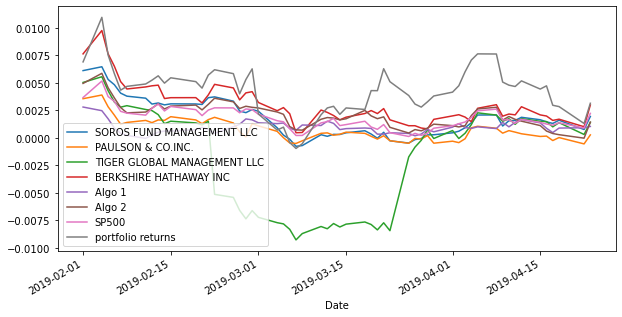

In [216]:
# Calculate rolling standard deviation
copy_combined_df.rolling(window=21).mean()
# Plot rolling standard deviation
copy_combined_df.rolling(window=21).mean().plot(figsize=(10,5))

### Calculate and plot the correlation

<AxesSubplot:>

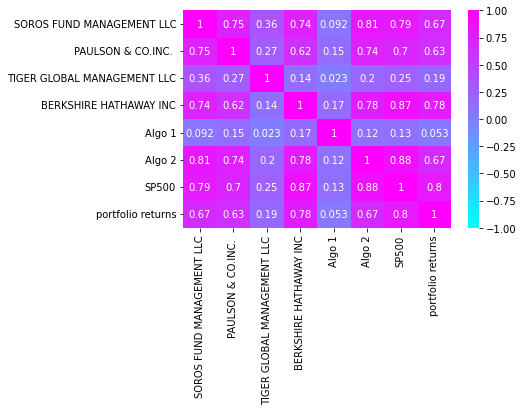

In [219]:
# Calculate and plot the correlation
correlation = copy_combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="cool")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'My Portfolio Beta'}, xlabel='Date'>

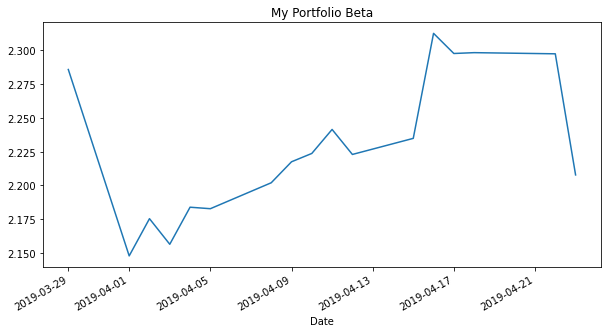

In [235]:
# Calculate and plot Beta
covariance = copy_combined_df['portfolio returns'].rolling(window=60).cov(copy_combined_df['SP500'])

# Calculate variance of S&P 500
variance = copy_combined_df['SP500'].rolling(window=60).var()
#variance


# Computing beta
beta = covariance / variance

# Plot rolling beta 
beta.plot(figsize=(10,5), title="My Portfolio Beta")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [231]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = copy_combined_df.mean()*252/(copy_combined_df.std()* np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      4.998934
PAULSON & CO.INC.              2.364248
TIGER GLOBAL MANAGEMENT LLC   -0.384135
BERKSHIRE HATHAWAY INC         4.442098
Algo 1                         3.488488
Algo 2                         5.051608
SP500                          4.196678
portfolio returns              2.992889
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

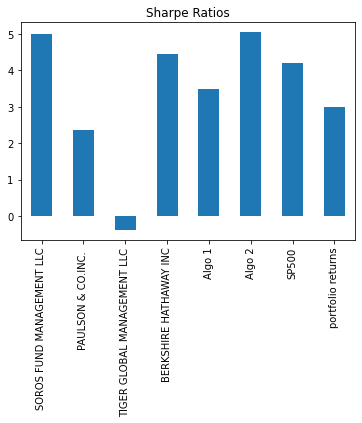

In [232]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

My portfolio does not outperform the SP&500!